
# Examen Final

* Finalización: 11am


El examen es a libro abierto. 
* Se permite googlear.
Será considerado cómo descalificación y caerá sobre el alumno todo el peso del reglamento académico el caso de que el alumno:
* Use una llms (Bard, chatgpt, bing,etc)
* Se mensajee con otros alumnos



# Ejercicio 1: Regresión (30pts)
**dataset**: "ventas_de_autos.csv"
**link**:  https://drive.google.com/file/d/1Uy4I3xus9Rh2MlhEkLNFo10FKuSNKdTQ/view?usp=sharing

*Contexto:
En un trabajo te piden predecir las ventas en función a las distintas variables que los ingenieros de datos pudieron recolectar. Se espera una interpretación clara sobre las razones que determinan las ventas de un auto.*

1. Entrene una regresión con statsmodels. (5pts/30pts)
2. ¿Hay que considerar una variable que tiene un p-valor menor a 0.5?  (5pts/30pts)
3. ¿Que variable de tu regresión tiene un p-valor menor a 0.5? (2.5pts/30pts)
4. Manteniendo todas las variables constantes. ¿Cual es el aumento esperado de las ventas si el auto es de japón?  (5pts/30pts)
5. Manteniendo todas las variables constantes. ¿Cual es el aumento o disminución esperada de las ventas si aumenta en 1 la edad del auto? (5pts/30pts)
6. Prediga las ventas para un auto que tiene 116mil de kilometraje, el pais de origen es Estados Unidos, el Ranking en revistas de auto es de 150, el precio de mercado libre es de  50.000 y la fecha_de_elaboracion es de 2015 (7.5pts/30pts)

# Ejercicio 2: Clasificación. (40pts)
**dataset**: "leads_a_clientes.csv"
**link** https://drive.google.com/file/d/1v0o7z70v06NIaBbmo6kwXdZX6pPf8Bdr/view?usp=sharing

*Contexto:
Se refieren cómo leads a aquellos clientes que son los prospectos, esto es, potenciales clientes que luego deciden si convertirse o no en clientes. Tu hipotesis es que dada la interacción del cliente con la empresa y sus caracteristicas, hay clientes con mayor probabilidad de conversión que otros.*

1. Calcular la variable edad (2pts/40pts)
2. Graficar boxplot de la variable edad (2pts/40pts)
3. Graficar boxplot de la variable  ingreso_estimado en funcion de la variable categoria.(2pts/40pts)
4. ¿A que conclusión llega en base al anterior boxplot? En base a esa explicación decida si debe sacar una categoria o no. (8pts/40pts)
5. Grafique la variable cantidad_mensajes en funcion de si es cliente o no. (2pts/40pts)
4. ¿Que conclusiones llega segun este gráfico? Que hipotesis tiene? (4pts/40pts)
5. Separar train y test (1pts/40pts)
6. Entrene un arbol de decision (1pts/40pts)
7. Prediga en test  (4pts/40pts)
8. Grafique una matriz de confusión de test. (2pts/40pts)
9. Grafique un árbol. (4pts/40pts)
10. ¿Cual es la variable del root node? ¿Que significa? Explique teniendo en cuenta el criterio de Gini Index (8pts/40pts)

# Ejercicio 3: ROI (30pts)
**datos**: Resultado del ejercicio anterior.

Teniendo en cuenta los resultados de la matriz de confusión en test del ejercicio anterior.

*Contexto: Tus hipotesis fueron demostradas dado el analisis de los puntos anteriores. Es decir, demostraste que esas variables eran consistentes con predecir que cliente va a convertir o no. Por lo tanto dado tu algoritmo la idea es generar una acción de la empresa. Hacer publicidad a los leads que predecis cómo clientes. Para esto debes responder:*

1. Si una publicidad cuesta 10 ¿Cuanto sería la publicidad desperdiciada?  (10pts/30pts)
2. Mirando la matriz de confusión cálcule el ROI del modelo suponiendo que la ganancia de un cliente por convertir es de 150, el costo de publicidad es de 10 y la inversión total corresponde al costo de publicidad total. (20pts/30pts)


___

In [879]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Ejercicio 1: Regresión (30pts)
**dataset**: "ventas_de_autos.csv"
**link**:  https://drive.google.com/file/d/1Uy4I3xus9Rh2MlhEkLNFo10FKuSNKdTQ/view?usp=sharing

*Contexto:
En un trabajo te piden predecir las ventas en función a las distintas variables que los ingenieros de datos pudieron recolectar. Se espera una interpretación clara sobre las razones que determinan las ventas de un auto.*

1. Entrene una regresión con statsmodels. (5pts/30pts)
2. ¿Hay que considerar una variable que tiene un p-valor menor a 0.5?  (5pts/30pts)
3. ¿Que variable de tu regresión tiene un p-valor menor a 0.5? (2.5pts/30pts)
4. Manteniendo todas las variables constantes. ¿Cual es el aumento esperado de las ventas si el auto es de japón?  (5pts/30pts)
5. Manteniendo todas las variables constantes. ¿Cual es el aumento o disminución esperada de las ventas si aumenta en 1 la edad del auto? (5pts/30pts)
6. Prediga las ventas para un auto que tiene 116mil de kilometraje, el pais de origen es Estados Unidos, el Ranking en revistas de auto es de 150, el precio de mercado libre es de  50.000 y la fecha_de_elaboracion es de 2015 (7.5pts/30pts)

In [880]:
df_ventas_autos = pd.read_csv("ventas_de_autos.csv", delimiter='|')
df_ventas_autos.head()

,Unnamed: 0,Kilometraje,Pais de Origen,Ranking en revistas de auto,precio en mercado libre,fecha_de_elaboracion,ventas
0,0,112018.633266,Japón,148,61584.272399,2014-04-22,1.202479e+06
1,1,144461.926443,Italia,399,25158.524810,2022-09-10,4.647200e+05
2,2,122538.858334,Francia,424,19465.272138,2017-09-07,3.554535e+05
3,3,111252.220684,Estados Unidos,289,32689.870546,2016-03-30,6.441774e+05
4,4,87612.685871,Francia,450,20477.240703,2015-08-30,3.800819e+05


In [881]:
df_ventas_autos.drop(['Unnamed: 0'], axis=1, inplace=True)

In [882]:
df_ventas_autos.head()

,Kilometraje,Pais de Origen,Ranking en revistas de auto,precio en mercado libre,fecha_de_elaboracion,ventas
0,112018.633266,Japón,148,61584.272399,2014-04-22,1.202479e+06
1,144461.926443,Italia,399,25158.524810,2022-09-10,4.647200e+05
2,122538.858334,Francia,424,19465.272138,2017-09-07,3.554535e+05
3,111252.220684,Estados Unidos,289,32689.870546,2016-03-30,6.441774e+05
4,87612.685871,Francia,450,20477.240703,2015-08-30,3.800819e+05


In [883]:
df_ventas_autos.columns

Index(['Kilometraje', 'Pais de Origen', 'Ranking en revistas de auto',
       'precio en mercado libre', 'fecha_de_elaboracion', 'ventas'],
      dtype='object')

In [884]:
from funciones.funciones_parcial2 import validate_columns
validate_columns(df_ventas_autos)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Kilometraje,NaN,15.0,0,0.0,"[178895.73515250554, 192914.2382977007, 185491..."
Pais de Origen,7,15,0,0.0,"[Estados Unidos, Alemania, Corea del Sur, Fran..."
Ranking en revistas de auto,NaN,15.0,0,0.0,"[128, 33, 164, 424, 32]"
precio en mercado libre,NaN,15.0,0,0.0,"[73181.89328705832, 41496.499293785935, 55719...."
fecha_de_elaboracion,15,15,0,0.0,"[2015-08-08, 2022-09-17, 2020-01-04, 2017-09-0..."
ventas,NaN,15.0,0,0.0,"[1423705.0445303747, 799954.0424012962, 106562..."


In [885]:
df_ventas_autos.dtypes

Kilometraje                    float64
Pais de Origen                  object
Ranking en revistas de auto      int64
precio en mercado libre        float64
fecha_de_elaboracion            object
ventas                         float64
dtype: object

In [886]:
df_ventas_autos["fecha_de_elaboracion"] = pd.to_datetime(df_ventas_autos["fecha_de_elaboracion"])

In [887]:
df_ventas_autos.dtypes

Kilometraje                           float64
Pais de Origen                         object
Ranking en revistas de auto             int64
precio en mercado libre               float64
fecha_de_elaboracion           datetime64[ns]
ventas                                float64
dtype: object

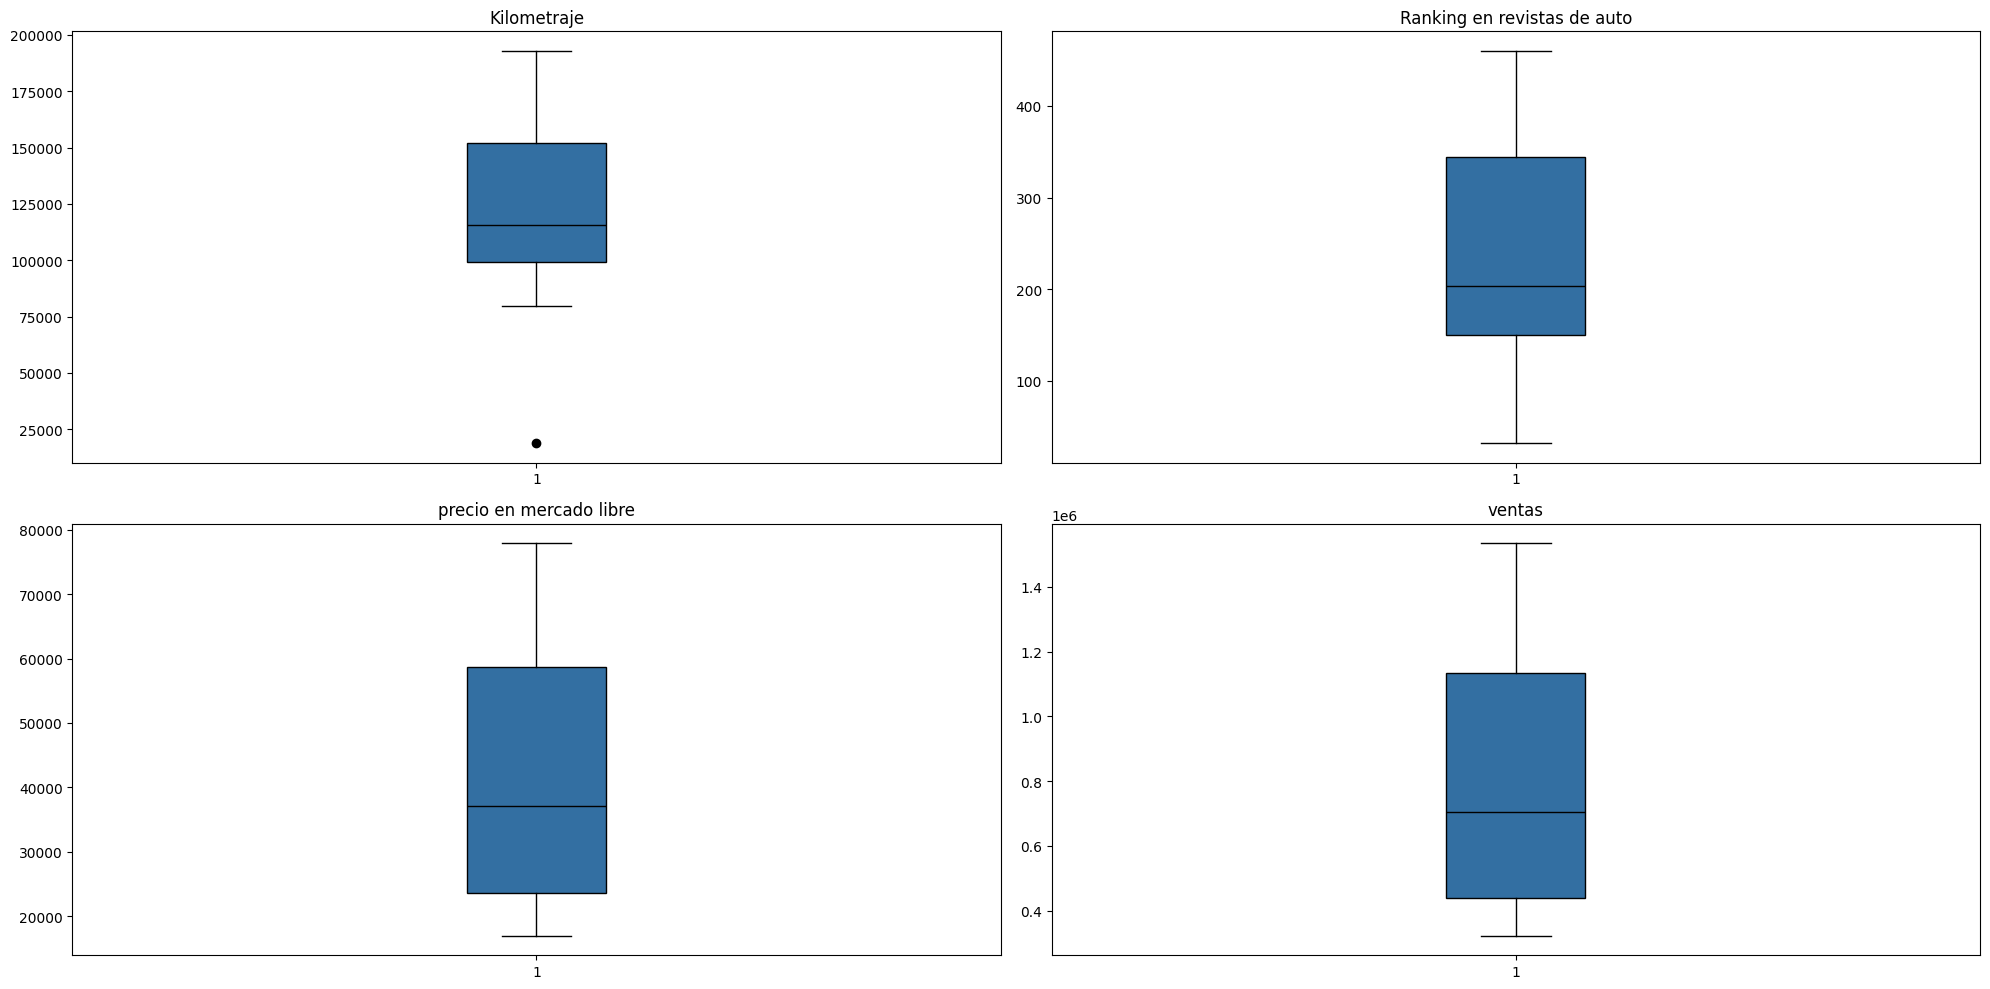

In [888]:
from funciones.funciones_parcial2 import plot_outliers
plot_outliers(df_ventas_autos)

In [889]:
from funciones.funciones_parcial2 import reconocimiento_de_outliers

outliers_kilometraje, outlier_values_kilometraje = reconocimiento_de_outliers(df_ventas_autos, "Kilometraje", 1.5)


Outliers de Kilometraje:
14    18852.031349
Name: Kilometraje, dtype: float64


In [890]:
from funciones.funciones_parcial2 import remove_outliers

df_ventas_autos = remove_outliers(df_ventas_autos, "Kilometraje", outliers_kilometraje)

#### Remuevo el outlier de kilometraje ya que es un valor muy bajo, que no se encuentra dentro de la media de los demas valores.

In [891]:
df_ventas_autos.columns = df_ventas_autos.columns.str.replace(' ', '_')

In [892]:
df_ventas_autos["hoy"]= "2023-12-14"
df_ventas_autos['hoy'] = pd.to_datetime(df_ventas_autos['hoy'])
df_ventas_autos['fecha_de_elaboracion'] = pd.to_datetime(df_ventas_autos['fecha_de_elaboracion'])
df_ventas_autos['edad_del_auto'] = (df_ventas_autos['hoy'] - df_ventas_autos['fecha_de_elaboracion']).dt.days//365

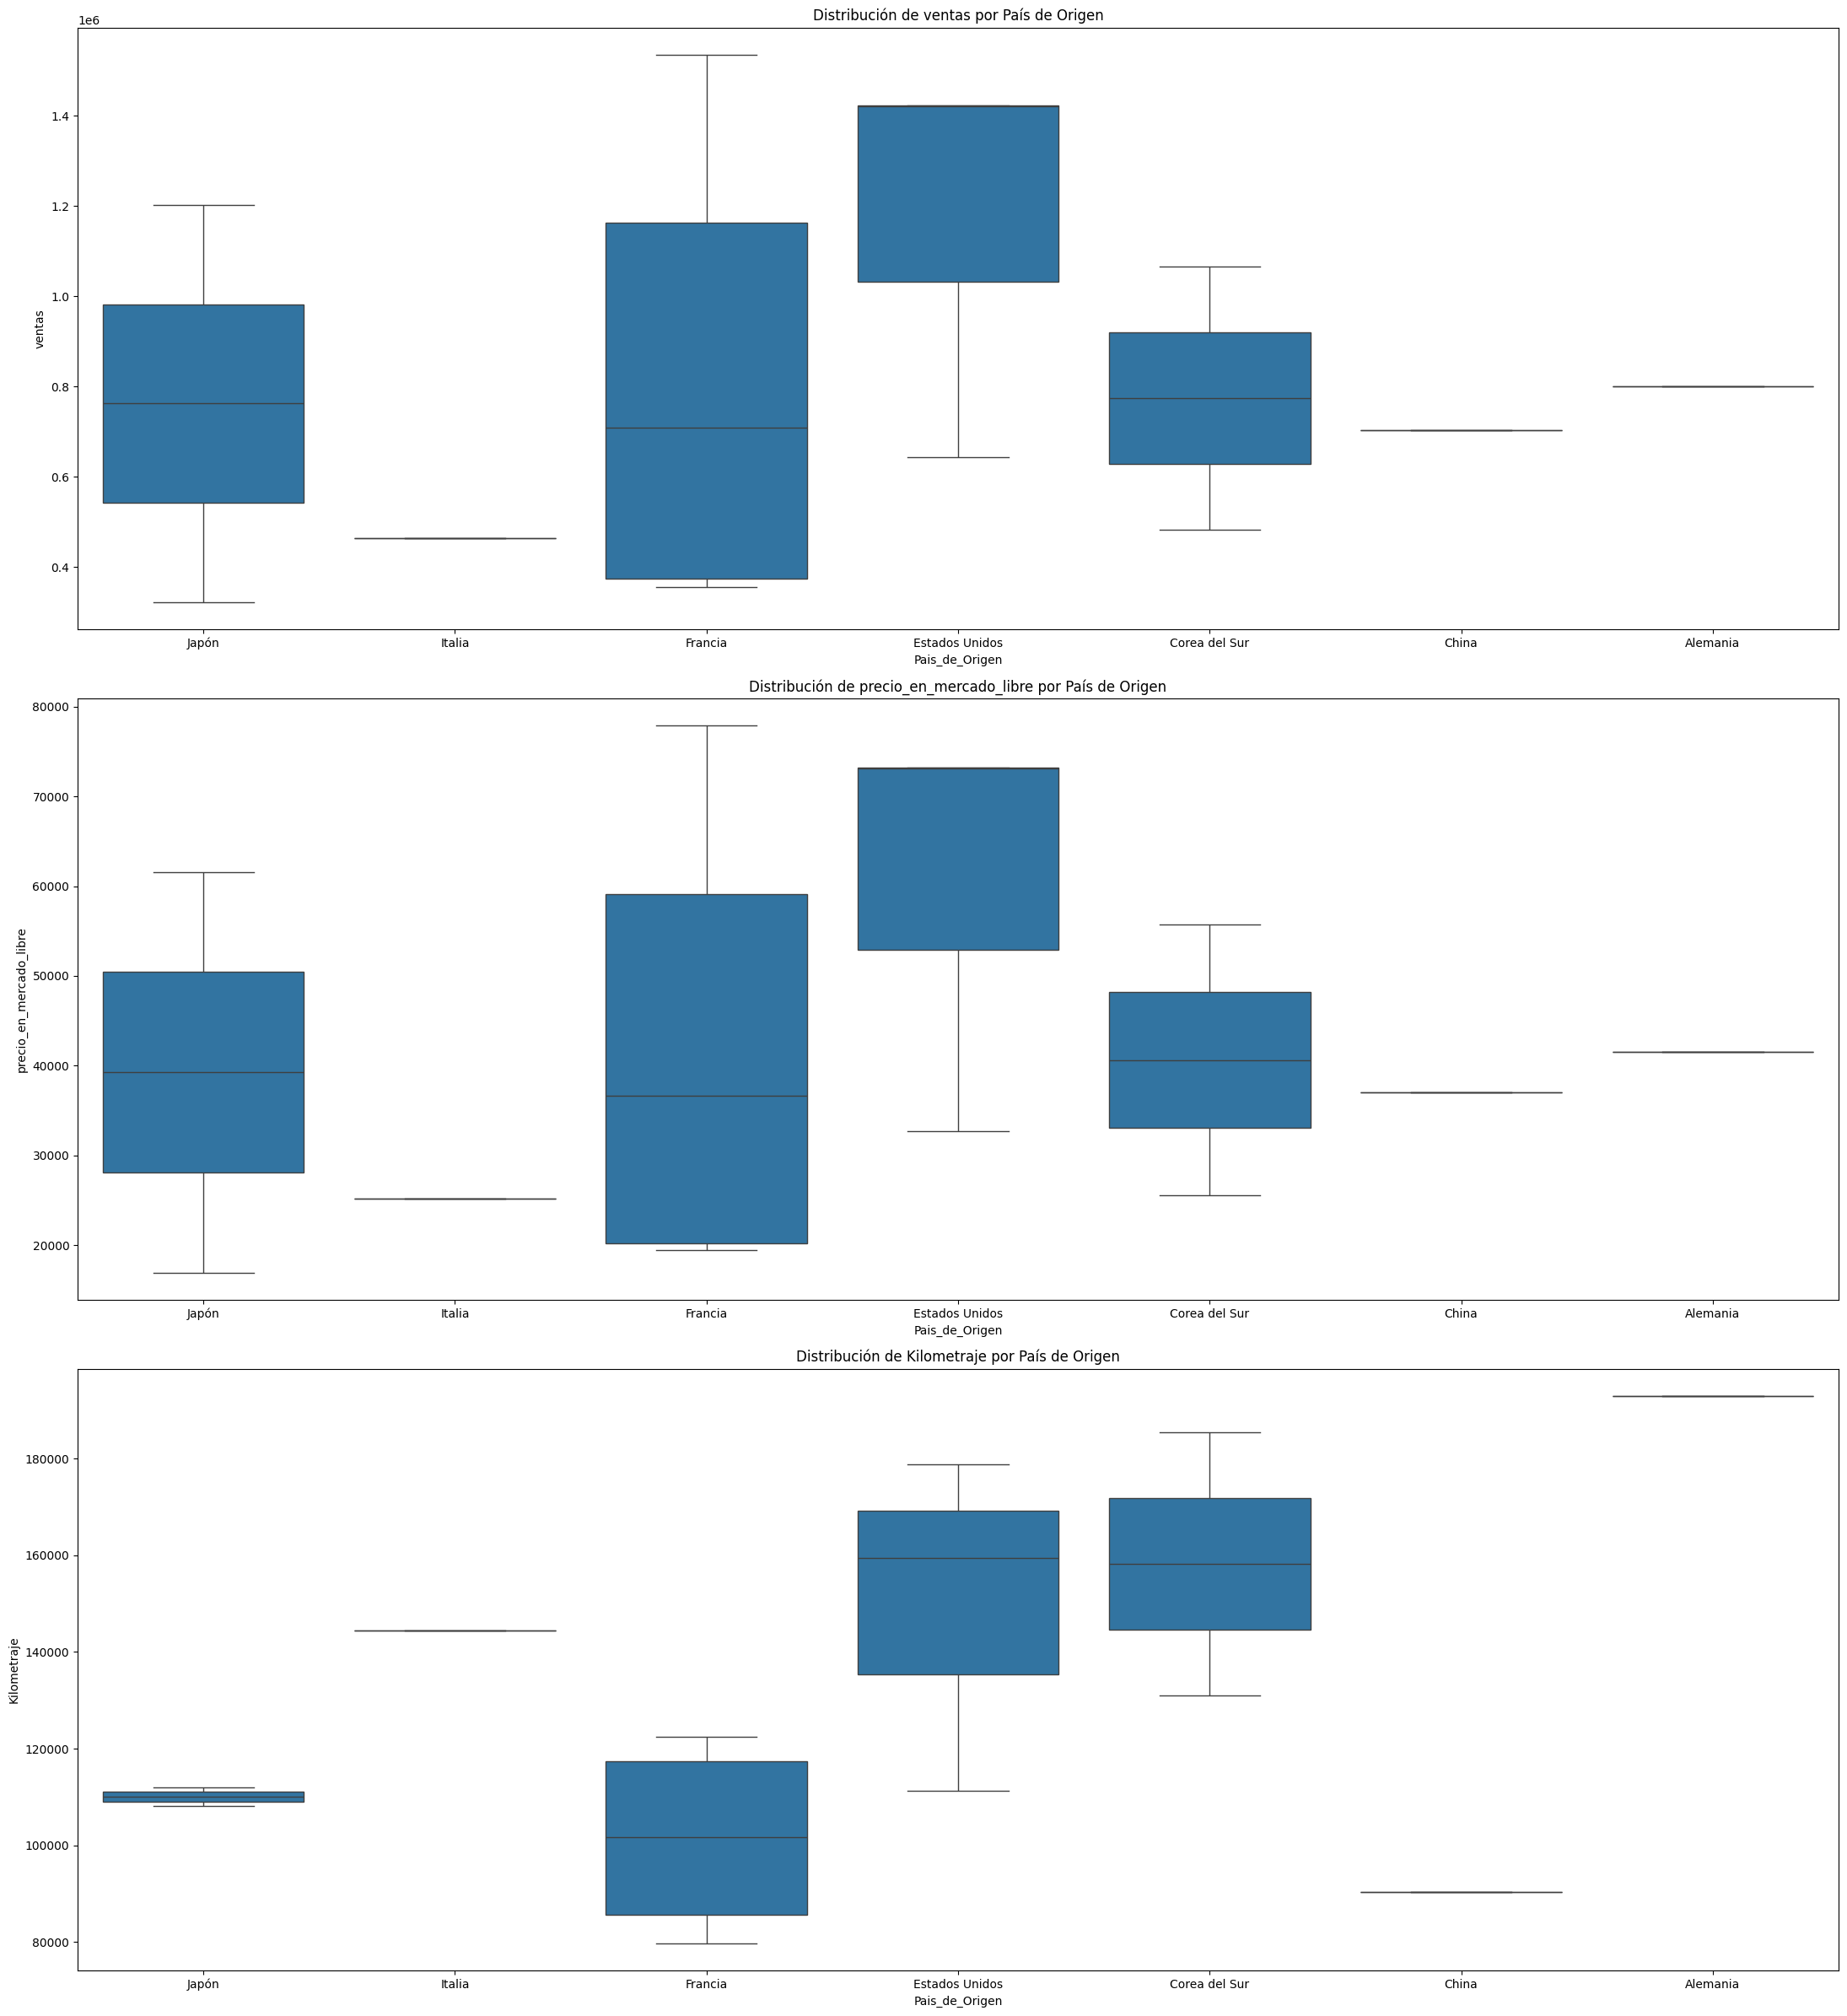

In [893]:
otras_variables = ['ventas', "precio_en_mercado_libre", "Kilometraje"]

plt.figure(figsize=(22, 24))
for i, variable in enumerate(otras_variables, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='Pais_de_Origen', y=variable, data=df_ventas_autos)
    plt.title(f'Distribución de {variable} por País de Origen')

plt.tight_layout()
plt.show()

In [894]:
df_ventas_autos.head()

,Kilometraje,Pais_de_Origen,Ranking_en_revistas_de_auto,precio_en_mercado_libre,fecha_de_elaboracion,ventas,hoy,edad_del_auto
0,112018.633266,Japón,148,61584.272399,2014-04-22,1.202479e+06,2023-12-14,9
1,144461.926443,Italia,399,25158.524810,2022-09-10,4.647200e+05,2023-12-14,1
2,122538.858334,Francia,424,19465.272138,2017-09-07,3.554535e+05,2023-12-14,6
3,111252.220684,Estados Unidos,289,32689.870546,2016-03-30,6.441774e+05,2023-12-14,7
4,87612.685871,Francia,450,20477.240703,2015-08-30,3.800819e+05,2023-12-14,8


In [895]:
df_ventas_autos.columns

Index(['Kilometraje', 'Pais_de_Origen', 'Ranking_en_revistas_de_auto',
       'precio_en_mercado_libre', 'fecha_de_elaboracion', 'ventas', 'hoy',
       'edad_del_auto'],
      dtype='object')

En un trabajo te piden predecir las ventas en función a las distintas variables que los ingenieros de datos pudieron recolectar. Se espera una interpretación clara sobre las razones que determinan las ventas de un auto.*

1. Entrene una regresión con statsmodels. (5pts/30pts)


In [896]:
from sklearn.preprocessing import OneHotEncoder
df_ventas_autos_ohe = OneHotEncoder(sparse=False)
df_ventas_autos_ohe.fit(df_ventas_autos[['Pais_de_Origen']])
df_ventas_autos_ohe.categories_

[array(['Alemania', 'China', 'Corea del Sur', 'Estados Unidos', 'Francia',
        'Italia', 'Japón'], dtype=object)]

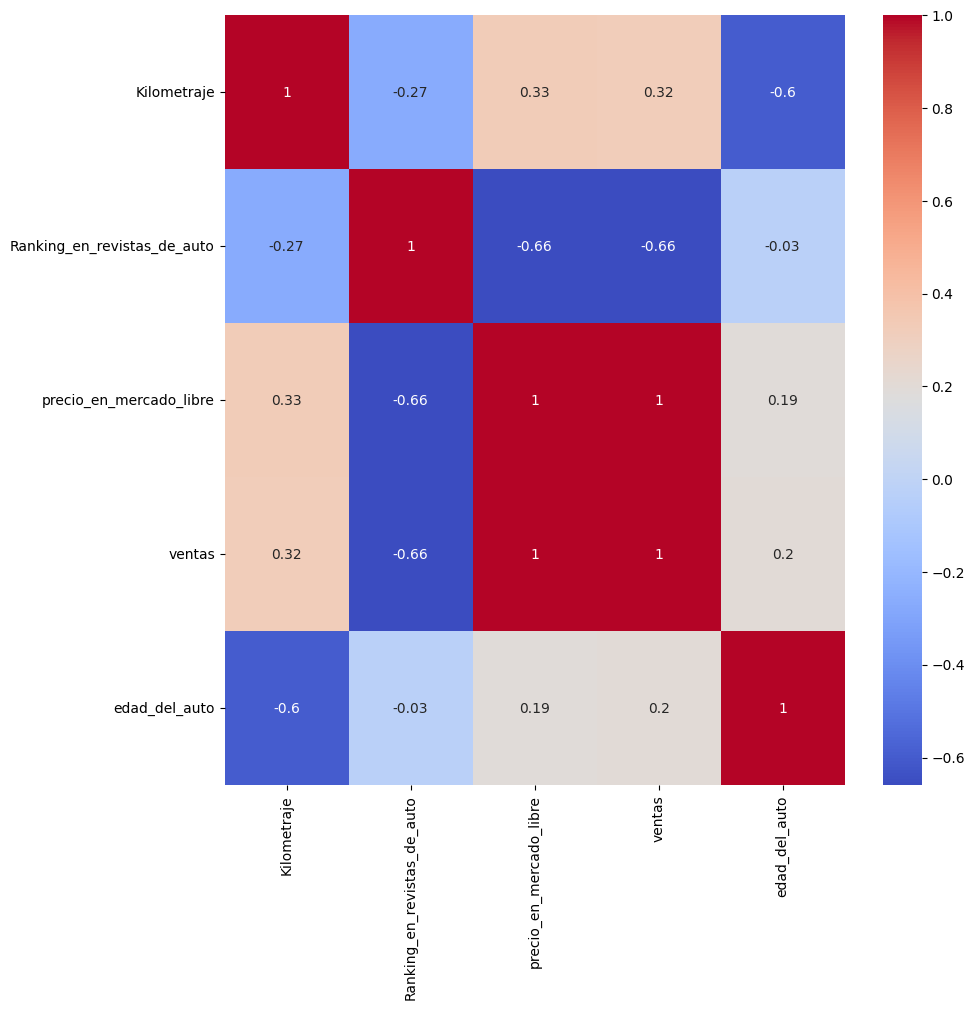

In [897]:
from funciones.funciones_parcial2 import crear_heatmap_correlacion
crear_heatmap_correlacion(df_ventas_autos)

In [898]:
df_ventas_autos

,Kilometraje,Pais_de_Origen,Ranking_en_revistas_de_auto,precio_en_mercado_libre,fecha_de_elaboracion,ventas,hoy,edad_del_auto
0,112018.633266,Japón,148,61584.272399,2014-04-22,1.202479e+06,2023-12-14,9
1,144461.926443,Italia,399,25158.524810,2022-09-10,4.647200e+05,2023-12-14,1
2,122538.858334,Francia,424,19465.272138,2017-09-07,3.554535e+05,2023-12-14,6
3,111252.220684,Estados Unidos,289,32689.870546,2016-03-30,6.441774e+05,2023-12-14,7
4,87612.685871,Francia,450,20477.240703,2015-08-30,3.800819e+05,2023-12-14,8
5,130949.352048,Corea del Sur,266,25562.497178,2018-08-04,4.816859e+05,2023-12-14,5
6,90329.506196,China,186,37054.228679,2014-11-06,7.039471e+05,2023-12-14,9
7,178895.735153,Estados Unidos,128,73181.893287,2015-08-08,1.423705e+06,2023-12-14,8
8,192914.238298,Alemania,33,41496.499294,2022-09-17,7.999540e+05,2023-12-14,1
9,79771.096171,Francia,32,52914.442052,2016-10-11,1.038587e+06,2023-12-14,7


In [899]:
features = ['Kilometraje', 'precio_en_mercado_libre', "Ranking_en_revistas_de_auto", "Pais_de_Origen", "edad_del_auto"]

In [900]:
formula = "ventas ~ " + ' + '.join(features)
formula

'ventas ~ Kilometraje + precio_en_mercado_libre + Ranking_en_revistas_de_auto + Pais_de_Origen + edad_del_auto'

In [901]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula=formula, data=df_ventas_autos)
modelo = modelo.fit()
print(modelo.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     2911.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           9.44e-06
Time:                        09:36:38   Log-Likelihood:                -136.75
No. Observations:                  14   AIC:                             295.5
Df Residuals:                       3   BIC:                             302.5
Df Model:                          10                                         
Covariance Type:            nonrobust  

2. ¿Hay que considerar una variable que tiene un p-valor menor a 0.5?  (5pts/30pts)


#### Un valor p bajo (generalmente, por debajo de 0.05) indica que el coeficiente es significativo, por lo tanto no habría que sacarlo del modelo. Si el mismo es mayor a 0,05 se puede considerar que el coeficiente no es significativo y se puede sacar del modelo.


3. ¿Que variable de tu regresión tiene un p-valor menor a 0.5? (2.5pts/30pts)

#### Las variables dentro de mi regresión lineal multivariable que tienen un p-valor menor a 0.5 son todas salvo Estados Unidos dentro de la variable pais_de_origen.

4. Manteniendo todas las variables constantes. ¿Cual es el aumento esperado de las ventas si el auto es de japón?  (5pts/30pts)

#### El coeficiente para Japón en el modelo es de (-14920). Esto significa que manteniendo el resto de las variables constante, el modelo predice que las ventas caeran en 14920 unidades si el auto es de Japón. Además su el p-value para este coeficiente es 0.469, que es mas grande que 0.05, por lo tanto no es significativo y se puede sacar del modelo.

5. Manteniendo todas las variables constantes. ¿Cual es el aumento o disminución esperada de las ventas si aumenta en 1 la edad del auto? (5pts/30pts)

#### El coeficiente para edad_del_auto en los resultados del modelo es 680.0104 . Esto significa que, manteniendo todas las demás variables constantes, el modelo predice que las ventas aumentarán en 680.0104 unidades si la edad del auto aumenta en 1 año.

6. Prediga las ventas para un auto que tiene 116mil de kilometraje, el pais de origen es Estados Unidos, el Ranking en revistas de auto es de 150, el precio de mercado libre es de  50.000 y la fecha_de_elaboracion es de 2015 (7.5pts/30pts)

In [902]:
prediccion = modelo.predict(pd.DataFrame({
    'Kilometraje': [116000],
    'Pais_de_Origen': ['Estados Unidos'],
    'Ranking_en_revistas_de_auto': [150],
    'precio_en_mercado_libre': [50000],
    'edad_del_auto': [2023 - 2015]
}))

print(f"La predicción de ventas para el auto es: {prediccion[0]}")

La predicción de ventas para el auto es: 984957.4166312594


___

# Ejercicio 2: Clasificación. (40pts)
**dataset**: "leads_a_clientes.csv"
**link** https://drive.google.com/file/d/1v0o7z70v06NIaBbmo6kwXdZX6pPf8Bdr/view?usp=sharing

*Contexto:
Se refieren cómo leads a aquellos clientes que son los prospectos, esto es, potenciales clientes que luego deciden si convertirse o no en clientes. Tu hipotesis es que dada la interacción del cliente con la empresa y sus caracteristicas, hay clientes con mayor probabilidad de conversión que otros.*

1. Calcular la variable edad (2pts/40pts)
2. Graficar boxplot de la variable edad (2pts/40pts)
3. Graficar boxplot de la variable  ingreso_estimado en funcion de la variable categoria.(2pts/40pts)
4. ¿A que conclusión llega en base al anterior boxplot? En base a esa explicación decida si debe sacar una categoria o no. (8pts/40pts)
5. Grafique la variable cantidad_mensajes en funcion de si es cliente o no. (2pts/40pts)
4. ¿Que conclusiones llega segun este gráfico? Que hipotesis tiene? (4pts/40pts)
5. Separar train y test (1pts/40pts)
6. Entrene un arbol de decision (1pts/40pts)
7. Prediga en test  (4pts/40pts)
8. Grafique una matriz de confusión de test. (2pts/40pts)
9. Grafique un árbol. (4pts/40pts)
10. ¿Cual es la variable del root node? ¿Que significa? Explique teniendo en cuenta el criterio de Gini Index (8pts/40pts)


In [903]:
df_leads_clientes = pd.read_csv("leads_a_clientes.csv")
df_leads_clientes.head()

,Unnamed: 0,fecha de nacimiento,clicks_en_web,puntaje,cantidad_mensajes,ingreso_estimado,categoria,cliente
0,0,1955-11-30 12:27:39.148023,50.109121,232.101644,135.281047,91.231418,Categoria D,Sí
1,1,1998-11-19 12:27:39.148023,2.109121,868.308119,55.687224,740.421698,Categoria D,No
2,2,1962-11-28 12:27:39.148023,14.109121,158.323178,119.574760,15.947268,Categoria D,Sí
3,3,1967-11-27 12:27:39.148023,2.109121,1074.171569,144.817864,950.486443,Categoria D,Sí
4,4,1982-11-23 12:27:39.148023,2.109121,205.078660,37.891444,63.656943,Categoria D,No


In [904]:
df_leads_clientes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [905]:
df_leads_clientes.columns

Index(['fecha de nacimiento', 'clicks_en_web', 'puntaje', 'cantidad_mensajes',
       'ingreso_estimado', 'categoria', 'cliente'],
      dtype='object')

In [906]:
from funciones.funciones_parcial2 import validate_columns
validate_columns(df_leads_clientes)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
fecha de nacimiento,90,3000,0,0.0,"[1957-11-29 12:27:39.148023, 1969-11-26 12:27:..."
clicks_en_web,NaN,3000.0,0,0.0,"[50.10912137603911, 45.89087862396089, 2.10912..."
puntaje,NaN,3000.0,0,0.0,"[488.1259802060485, 404.89061893239887, 527.95..."
cantidad_mensajes,NaN,3000.0,0,0.0,"[91.26503325083983, 108.99424200463986, 65.409..."
ingreso_estimado,NaN,3000.0,0,0.0,"[352.4807399412387, 267.54669782526975, 393.12..."
categoria,4,3000,0,0.0,"[Categoria A, Categoria A, Categoria A, Catego..."
cliente,2,3000,0,0.0,"[Sí, Sí, No, Sí, Sí]"


In [907]:
df_leads_clientes.dtypes

fecha de nacimiento     object
clicks_en_web          float64
puntaje                float64
cantidad_mensajes      float64
ingreso_estimado       float64
categoria               object
cliente                 object
dtype: object

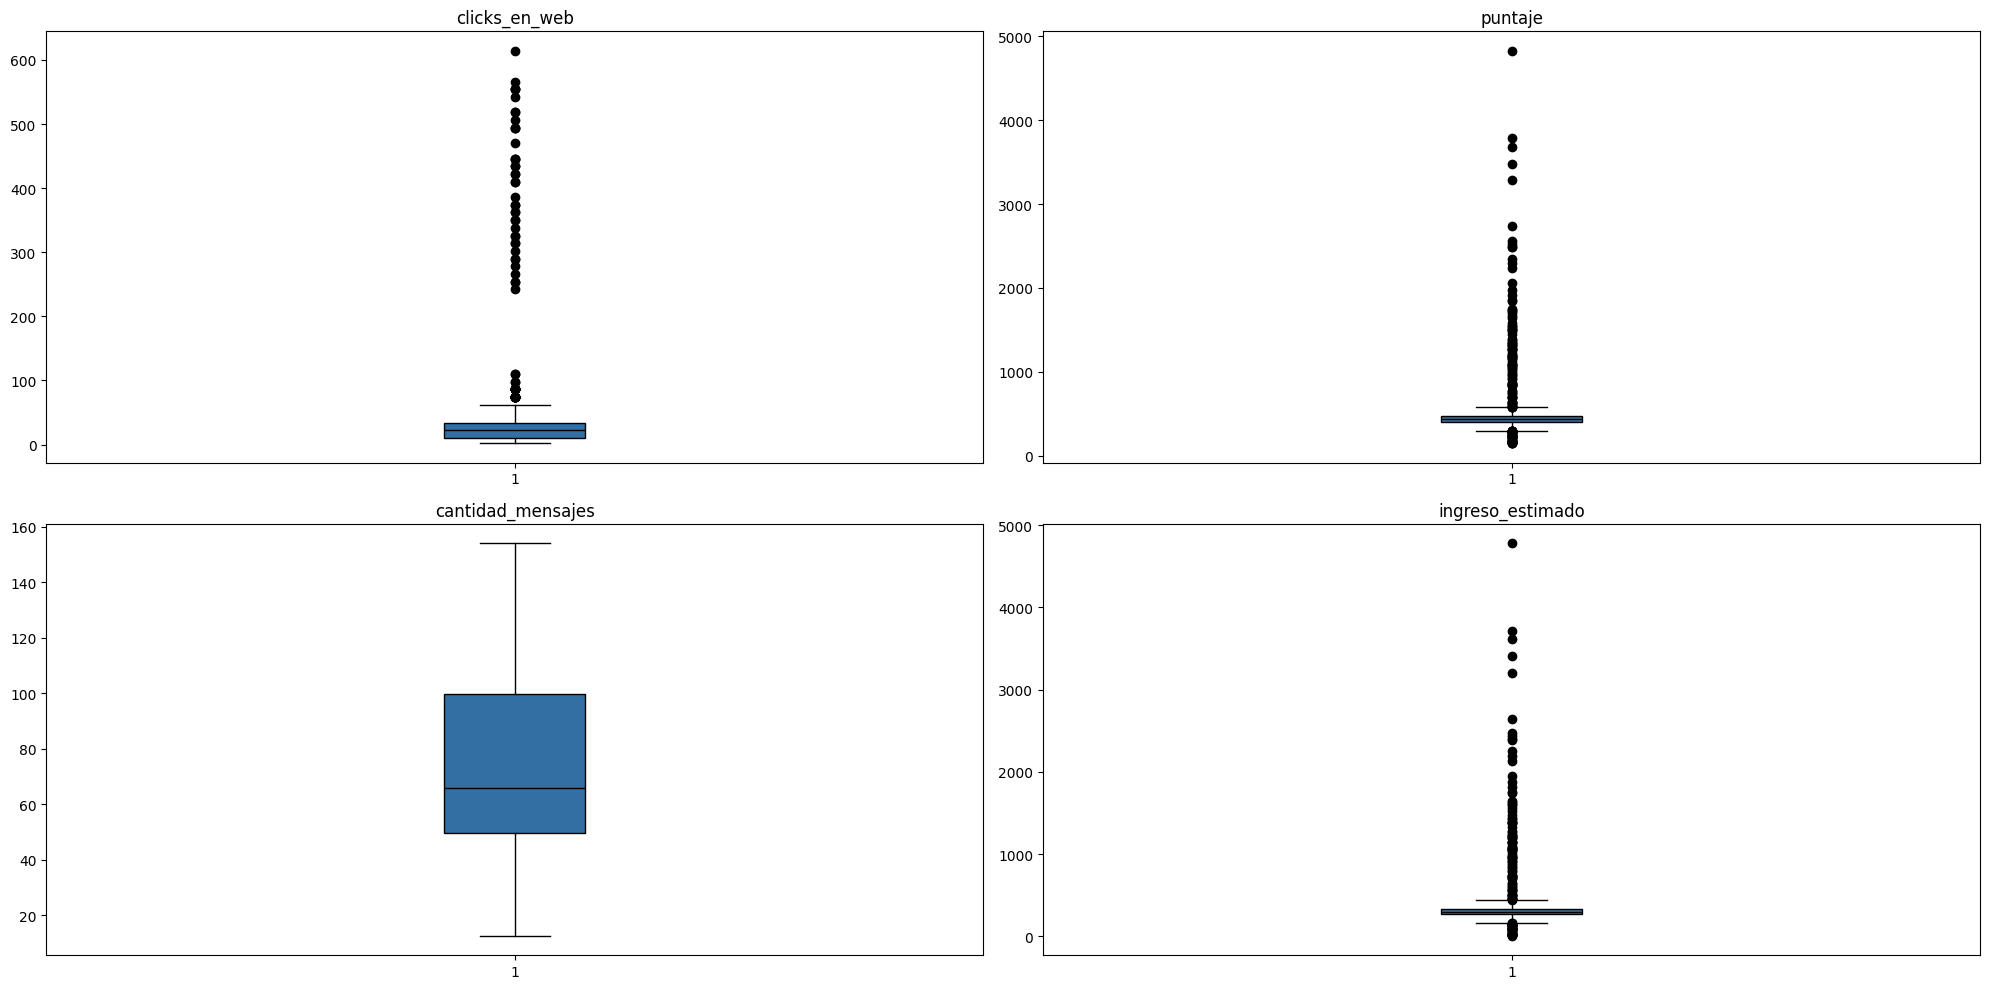

In [908]:
from funciones.funciones_parcial2 import plot_outliers
plot_outliers(df_leads_clientes)

In [909]:
df_leads_clientes.columns = df_leads_clientes.columns.str.replace(' ', '_')

1. Calcular la variable edad (2pts/40pts)

In [910]:
df_leads_clientes["hoy"]= "2023-12-14"
df_leads_clientes['hoy'] = pd.to_datetime(df_leads_clientes['hoy'])
df_leads_clientes['fecha_de_nacimiento'] = pd.to_datetime(df_leads_clientes['fecha_de_nacimiento'])
df_leads_clientes['edad_del_auto'] = (df_leads_clientes['hoy'] - df_leads_clientes['fecha_de_nacimiento']).dt.days//365

In [911]:
df_leads_clientes

,fecha_de_nacimiento,clicks_en_web,puntaje,cantidad_mensajes,ingreso_estimado,categoria,cliente,hoy,edad_del_auto
0,1955-11-30 12:27:39.148023,50.109121,232.101644,135.281047,91.231418,Categoria D,Sí,2023-12-14,68
1,1998-11-19 12:27:39.148023,2.109121,868.308119,55.687224,740.421698,Categoria D,No,2023-12-14,25
2,1962-11-28 12:27:39.148023,14.109121,158.323178,119.574760,15.947268,Categoria D,Sí,2023-12-14,61
3,1967-11-27 12:27:39.148023,2.109121,1074.171569,144.817864,950.486443,Categoria D,Sí,2023-12-14,56
4,1982-11-23 12:27:39.148023,2.109121,205.078660,37.891444,63.656943,Categoria D,No,2023-12-14,41
...,...,...,...,...,...,...,...,...,...
2995,1962-11-28 12:27:39.148023,14.109121,351.827087,36.691961,213.400237,Categoria B,No,2023-12-14,61
2996,1962-11-28 12:27:39.148023,21.890879,494.859133,53.525986,359.351304,Categoria B,No,2023-12-14,61
2997,1980-11-23 12:27:39.148023,50.109121,488.597332,44.621153,352.961711,Categoria A,No,2023-12-14,43
2998,1982-11-23 12:27:39.148023,26.109121,368.592515,53.934444,230.507817,Categoria A,No,2023-12-14,41


2. Graficar boxplot de la variable edad (2pts/40pts)

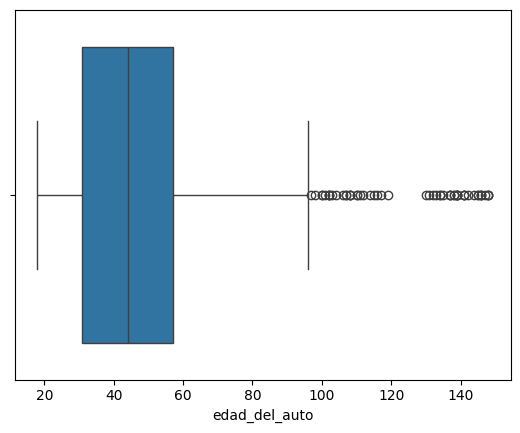

In [912]:
sns.boxplot(x=df_leads_clientes['edad_del_auto'])
plt.show()

In [913]:
df_leads_clientes["edad_del_auto"].max()

148

#### Es demasiado raro que un auto tenga más de 100 años de edad, por lo tanto se decide sacar del dataset los autos que tengan más de 100 años de edad.

In [914]:
df_leads_clientes = df_leads_clientes[df_leads_clientes['edad_del_auto'] < 100]

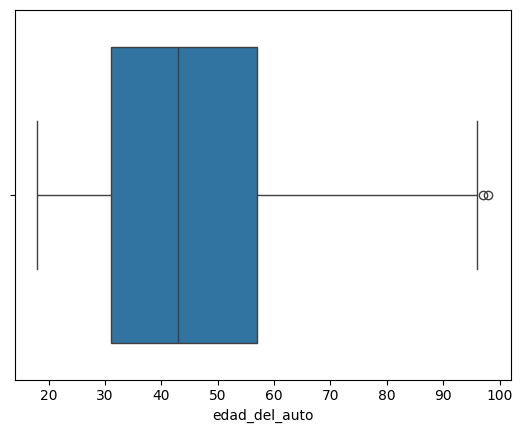

In [915]:
sns.boxplot(x=df_leads_clientes['edad_del_auto'])
plt.show()

3. Graficar boxplot de la variable ingreso_estimado en funcion de la variable categoria.(2pts/40pts)

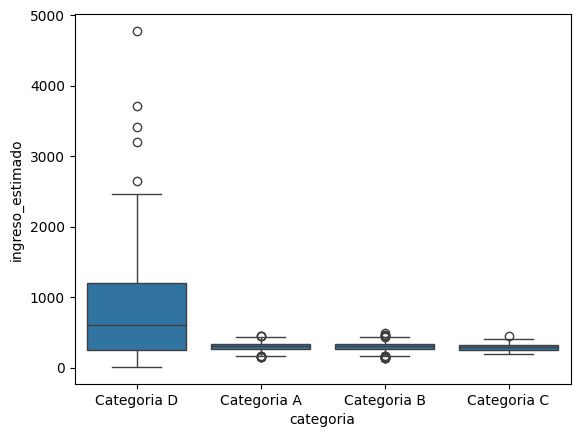

In [916]:
sns.boxplot(x='categoria', y='ingreso_estimado', data=df_leads_clientes)
plt.show()

4. ¿A que conclusión llega en base al anterior boxplot? En base a esa explicación decida si debe sacar una categoria o no. (8pts/40pts)

In [917]:
df_leads_clientes[df_leads_clientes['cliente'] == 'Sí'].groupby('categoria')['cliente'].count()

categoria
Categoria A    674
Categoria B    665
Categoria C     31
Categoria D     71
Name: cliente, dtype: int64

In [918]:
df_leads_clientes = df_leads_clientes[df_leads_clientes['categoria'] != 'Categoria D']

### Decido sacar la categoría D ya que es la que mayor cantidad de outliers tiene y además es una de las que menor cantidad de clientes tiene.

5. Grafique la variable cantidad_mensajes en funcion de si es cliente o no. (2pts/40pts)

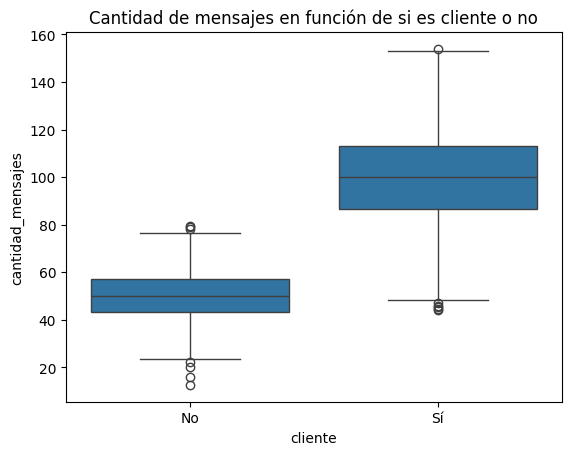

In [919]:
sns.boxplot(x='cliente', y='cantidad_mensajes', data=df_leads_clientes)
plt.title('Cantidad de mensajes en función de si es cliente o no')
plt.show()

6. ¿Que conclusiones llega segun este gráfico? Que hipotesis tiene? (4pts/40pts)

#### Este gráfico de la cantidad de mensajes en función de si es cliente o no podría ayudarme a entender si hay una diferencia en la cantidad de mensajes enviados entre los clientes y los no clientes.
#### Si los clientes tienden a tener una mayor cantidad de mensajes, esto podría sugerir que la interacción frecuente (a través de mensajes) puede estar relacionada con la conversión de un lead a un cliente. 
#### Por otro lado, si no hay una diferencia significativa en la cantidad de mensajes entre los clientes y los no clientes, esto podría sugerir que la cantidad de mensajes no es un factor determinante para la conversión de un lead a un cliente.

7. Separar train y test (1pts/40pts)

In [920]:
from sklearn.preprocessing import LabelEncoder
df_leads_clientes_le = LabelEncoder()
df_leads_clientes_le.fit(df_leads_clientes['categoria'])
df_leads_clientes_le.classes_

array(['Categoria A', 'Categoria B', 'Categoria C'], dtype=object)

In [921]:
df_leads_clientes['categoria'] = df_leads_clientes_le.transform(df_leads_clientes['categoria'])

In [922]:
df_leads_clientes['cliente'] = df_leads_clientes['cliente'].map({'Sí': 1, 'No': 0})

In [923]:
X = df_leads_clientes[["edad_del_auto", 'ingreso_estimado', 'cantidad_mensajes', "puntaje", "clicks_en_web", "categoria"]]
y = df_leads_clientes['cliente']

In [924]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

8. Entrene un arbol de decision (1pts/40pts)

In [925]:
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model = decision_tree_model.fit(X_train, y_train)

9. Prediga en test  (4pts/40pts)

In [926]:
y_pred = decision_tree_model.predict(X_test)


10. Grafique una matriz de confusión de test. (2pts/40pts)

In [927]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculating metrics manually using the confusion matrix
tp, fn, fp, tn = conf_matrix.ravel()

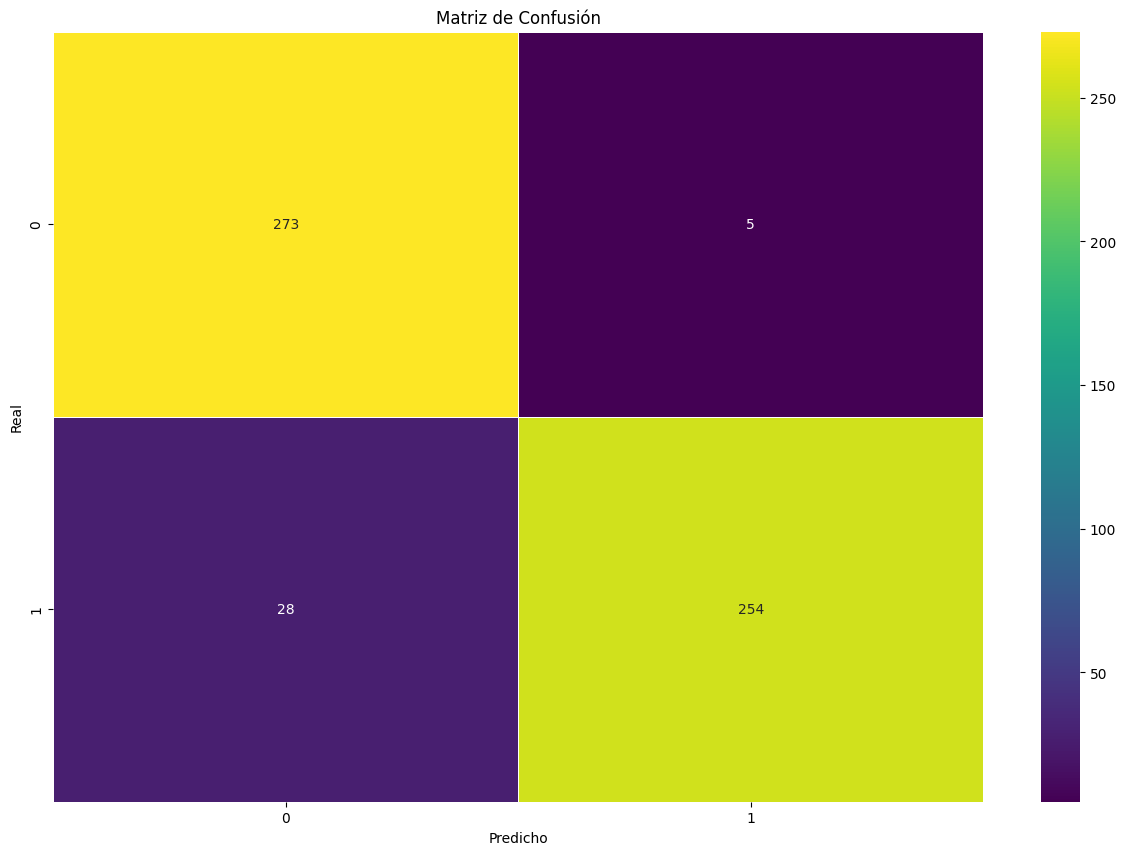

In [928]:
# y_pred = decision_tree_model.predict(X_test)
y_true = y_test
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

In [929]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

print("Precisión:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Exactitud:", accuracy_score(y_true, y_pred))

Precisión: 0.9806949806949807
Recall: 0.900709219858156
Exactitud: 0.9410714285714286


11. Grafique un árbol. (4pts/40pts)

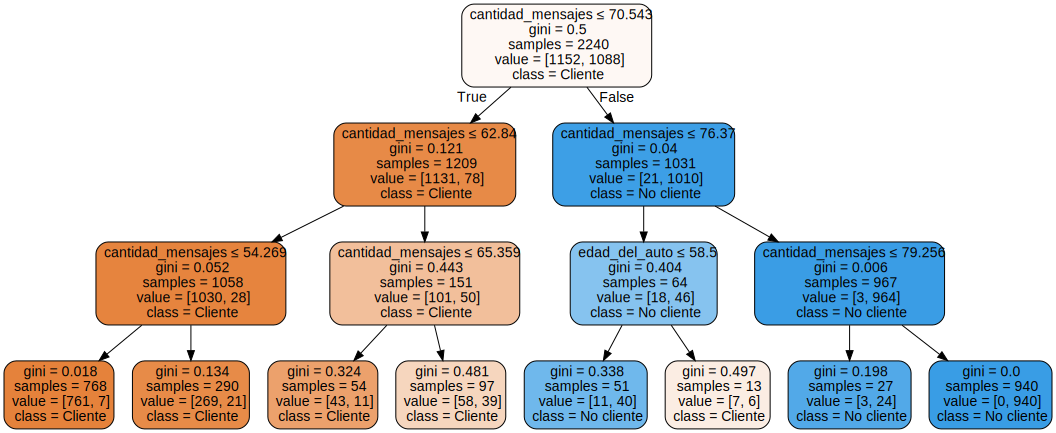

In [930]:
#!pip install scikit-learn graphviz matplotlib
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol en formato DOT
dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Cliente', 'No cliente'],  # Ajusta según tus clases
                           filled=True, rounded=True,  
                           special_characters=True)  

# Usar Graphviz para crear la visualización
graph = graphviz.Source(dot_data)  
graph.render("arbol_decision")  # Guarda el gráfico como un archivo .png
graph 

12. ¿Cual es la variable del root node? ¿Que significa? Explique teniendo en cuenta el criterio de Gini Index (8pts/40pts)

#### El arbol de decision tiene la siguiente estructura. Nodo raíz (sin ramas entrantes, se produce la primera división en función de la variable más importante), ramas (alimentan los nodos internos), nodos internos (nodos de decisión, vuelven a dividir el conjunto de datos en función de las variables) y nodos hoja/terminales (representan todos los resultados posibles del conjunto de datos, su función es indicar la clasificación definitiva).

#### En este caso la variable del root node es la variable cantidad_mensajes. Esto significa que la variable cantidad_mensajes es la variable más importante para predecir si un lead se convertirá en cliente o no. Esto se debe a que es la variable que tiene el mayor Gini Index, es decir, la variable que tiene la mayor capacidad de separar los datos en función de la variable objetivo.


___

# Ejercicio 3: ROI (30pts)
**datos**: Resultado del ejercicio anterior.

Teniendo en cuenta los resultados de la matriz de confusión en test del ejercicio anterior.

*Contexto: Tus hipotesis fueron demostradas dado el analisis de los puntos anteriores. Es decir, demostraste que esas variables eran consistentes con predecir que cliente va a convertir o no. Por lo tanto dado tu algoritmo la idea es generar una acción de la empresa. Hacer publicidad a los leads que predecis cómo clientes. Para esto debes responder:*

1. Si una publicidad cuesta 10 ¿Cuanto sería la publicidad desperdiciada?  (10pts/30pts)
2. Mirando la matriz de confusión cálcule el ROI del modelo suponiendo que la ganancia de un cliente por convertir es de 150, el costo de publicidad es de 10 y la inversión total corresponde al costo de publicidad total. (20pts/30pts)

In [931]:
print(conf_matrix)

[[273   5]
 [ 28 254]]


In [932]:
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]

1. La publicidad desperdiciada sería el costo de publicidad para los leads que el modelo predijo incorrectamente como clientes. Esto correspondería a los Falsos Positivos (FP). Si cada publicidad cuesta 10, entonces la publicidad desperdiciada sería `FP * 10`.

In [933]:
publicidad_desperdiciada = FP * 10
print("El costo de publicidad desperdiciada sería de:", "$", publicidad_desperdiciada)

El costo de publicidad desperdiciada sería de: $ 50


2. El ROI se calcula como `(Ganancias - Costo) / Costo`. En este caso, las ganancias provienen de los clientes que el modelo predijo correctamente (TP), cada uno aportando 150. El costo es la inversión total en publicidad, que sería 10 * (TP + FP) . Entonces, el ROl sería `((Costo Total Publicidad * 150) - 10 * (TP + FP)) / (10 * (TP + FP))`

In [934]:
ganancias = TP * 150
costo = 10 * (TP + FP)

In [935]:
ROI = (ganancias - costo) / costo
print(f"El ROI del modelo sería: {ROI}")

El ROI del modelo sería: 13.71042471042471
